# _

In [2]:
data_path = '../../data/'

In [3]:
import random
import pickle

import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
from jupyterthemes import jtplot

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from utils import TextProcessor

C:\Users\nikitosoleil\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [12]:
jtplot.style('gruvboxd')

In [4]:
que = pd.read_csv(data_path + 'questions.csv')
tag_que = pd.read_csv(data_path + 'tag_questions.csv')
tags = pd.read_csv(data_path + 'tags.csv')
pro = pd.read_csv(data_path + 'professionals.csv')
ans = pd.read_csv(data_path + 'answers.csv')

In [7]:
que_tags = que.merge(tag_que, left_on = 'questions_id', right_on = 'tag_questions_question_id').merge(tags, left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')
que_tags = que.merge(que_tags, on = 'questions_id')
ans_que_tags = ans.merge(que_tags, left_on = "answers_question_id", right_on = "questions_id")
df = ans_que_tags.merge(pro, left_on = 'answers_author_id', right_on = 'professionals_id')

In [8]:
df

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,questions_id,questions_author_id_x,questions_date_added_x,questions_title_x,questions_body_x,...,questions_body_y,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,...,What is a maths teacher? what is a ma...,14147,332a511f1569444485cf7a7a556a5e54,14147,lecture,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
1,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,...,What is a maths teacher? what is a ma...,27490,332a511f1569444485cf7a7a556a5e54,27490,college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
2,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14 UTC+0000,<p>Hi!</p>\n<p>You are asking a very interesti...,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,...,What is a maths teacher? what is a ma...,21438,332a511f1569444485cf7a7a556a5e54,21438,professor,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
3,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,...,I like soccer because i been playing sense i w...,27490,0f1d6a4f276c4a05878dd48e03e52289,27490,college,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
4,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,...,I like soccer because i been playing sense i w...,21015,0f1d6a4f276c4a05878dd48e03e52289,21015,building,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015-10-19 20:56:49 UTC+0000
5,f3519ab99a1a4a13a8a9ecb814287d2a,36ff3b3666df400f956f8335cf53e09e,0f1d6a4f276c4a05878dd48e03e52289,2016-07-31 15:35:54 UTC+0000,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,0f1d6a4f276c4a05878dd48e03e52289,585ac233015447cc9e9a217044e515e1,2016-05-19 22:16:25 UTC+0000,what kind of college could i go to for a soc...,I like soccer because i been playing sense i w...,...,I like soccer because i been playing sense i w...,21727,0f1d6a4f276c4a05878dd48e03e52289,21727,soccer,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",Mental Health Care,Assist with Recognizing and Developing Potential,2015

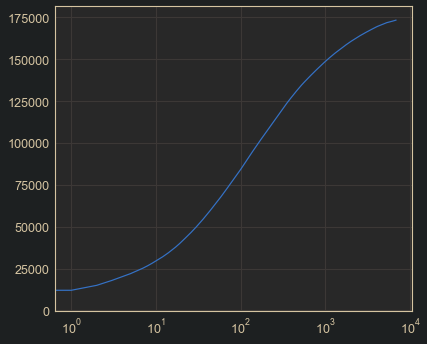

In [15]:
plt.plot(df.tags_tag_name.value_counts().values.cumsum())
plt.xscale('log')

In [16]:
df.tags_tag_name.value_counts()[:1000]

college                               8074
career                                3944
engineering                           2966
business                              2884
medicine                              2266
technology                            1818
college-major                         1724
doctor                                1525
science                               1504
psychology                            1460
finance                               1402
computer-science                      1256
nursing                               1202
career-counseling                     1194
accounting                            1184
teaching                              1181
education                             1095
computer                              1081
engineer                              1075
healthcare                            1074
law                                   1056
teacher                               1024
marketing                             1009
career-choi

# _

In [1]:
import pickle

In [5]:
with open('tags_embs.pickle', 'rb') as file:
    print(pickle.load(file).keys())

dict_keys(['fafsa', 'entertain', 'colleg', 'bank', 'cia', 'children', 'marriag therapist', 'chemistri', 'human resourc', 'medicin', 'microsoft', 'instruct', 'social media', 'psycholog', 'econom', 'internship', 'mathemat', 'market', 'work', 'engin', 'counsel', 'passion', 'sociolog', 'colleg major', 'histori', 'creativ', 'organ', 'salari', 'art illustr', 'veterinarian', 'non profit', 'career', 'sport', 'govern', 'studi', 'aircraft', 'polit scienc', 'militari', 'instat', 'high school class', 'degre', 'familyandconsumersci', 'data mine', 'colleg advis', 'major', 'sat', 'patholog', 'busi', 'administr', 'geophys', 'ceo', 'travel', 'fashion', 'environ', 'comput softwar', 'schedul', 'nonprofit', 'graduat', 'educ', 'athlet', 'person develop', 'youth advocaci', 'softwar', 'employe', 'art therapi', 'design', 'photographi', 'licens', 'job', 'medicaldoctor', 'race discrimin', 'graduat program', 'broadway', 'cardiolog', 'career counsel', 'comput program', 'money', 'dean', 'anthropolog', 'comput', 't

In [4]:
with open('industries_embs.pickle', 'rb') as file:
    print(pickle.load(file).keys())

dict_keys(['higher educ', 'automot', 'media product', 'manag consult', 'music', 'nan', 'educ manag', 'entertain', 'market advertis', 'entrepreneur', 'telecommun', 'inform technolog servic', 'mental health care', 'consult engin', 'market', 'market research', 'consum servic', 'pharmaceut', 'internet', 'broadcast media', 'civic social organ', 'individu famili servic', 'bank', 'earli childhood educ', 'mechan industri engin', 'health well fit', 'insur', 'account', 'graphic design illustr', 'legal servic', 'sport good', 'legal', 'student servic', 'research', 'career counsel', 'write edit', 'art craft', 'human resourc', 'comput softwar', 'comput game', 'defens space', 'consum good', 'consult', 'danc perform art', 'transport truck railroad', 'util', 'profession train', 'profession servic', 'consum', 'nonprofit organ manag', 'career counsel employ coach', 'hospit health care', 'non profit organ manag', 'technic financ real estat media public account healthcar technolog sale market etc', 'fine a